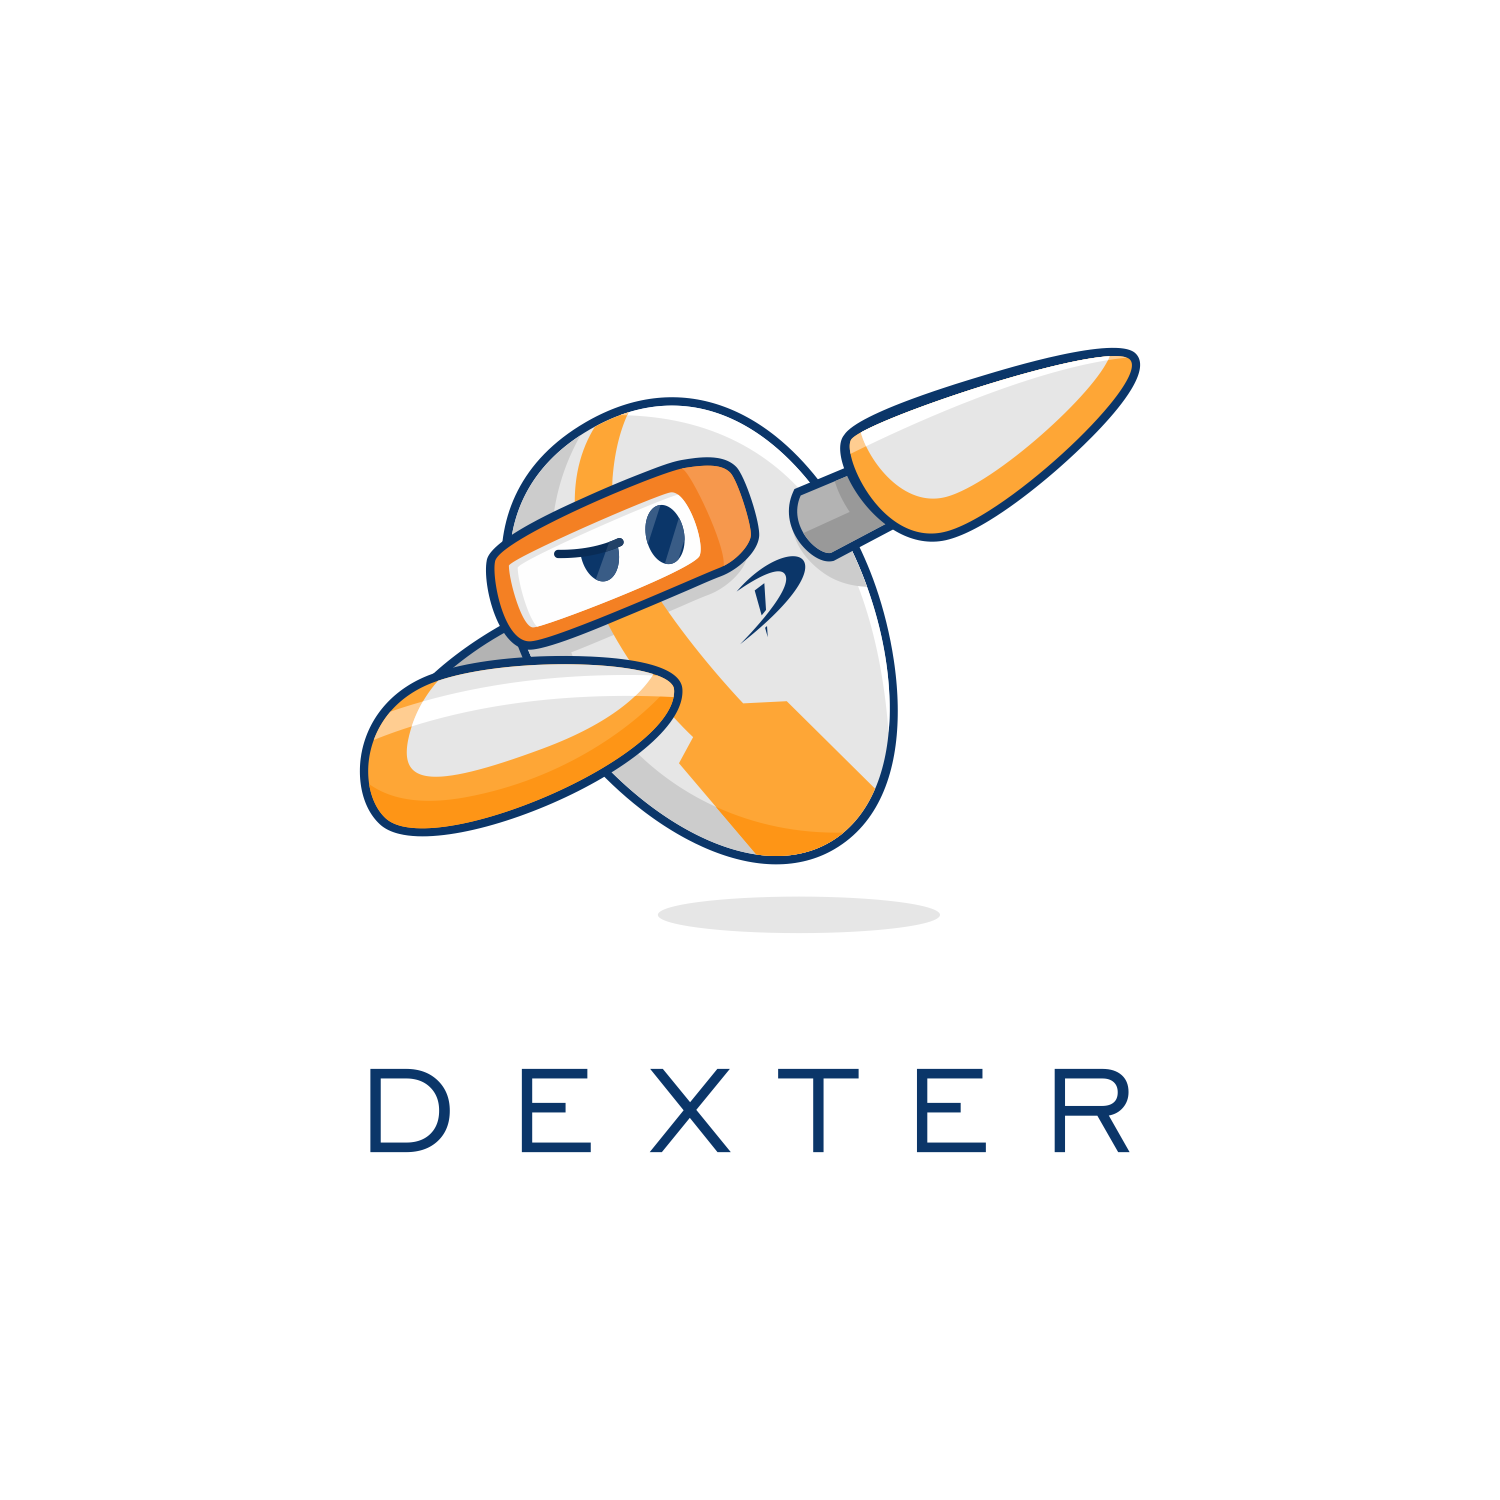


# Logistic Regression

#### What is Logistic Regression?

Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

Sometimes logistic regressions are difficult to interpret; the Intellectus Statistics tool easily allows you to conduct the analysis, then in plain English interprets the output.


#### Types of Questions Binary Logistic Regression Can Answer

How does the probability of getting lung cancer (yes vs. no) change for every additional pound a person is overweight and for every pack of cigarettes smoked per day?

Do body weight, calorie intake, fat intake, and age have an influence on the probability of having a heart attack (yes vs. no)?

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [2]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading Dataset

The data is already in good condition. We have already cleaned analayzed it before and it's time to deploy some of the Logistic Regression techniques to get more out of it.

In [3]:
#reading the dataset
adver_df = pd.read_csv('advertising.csv')

In [4]:
#exploring the dataset
adver_df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [6]:
#checking the head of df
adver_df.head(11)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


*The dataframe above reflects 10 columns in which "Clicked on Ad" columns contains only 0 & 1(This zero and one shows which person has clicked on the ad and which one has not, one mean the ad has been clicked while zero means that it's not touched) which we will be using as our Y and in X there will be other columns. Let move further with our dataset.*

In [12]:
#he info() function is used to print a concise summary of a DataFrame. 
#This method prints information about a DataFrame 
#including the index dtype and column dtypes, non-null values and memory usage
adver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [13]:
adver_df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


<AxesSubplot:>

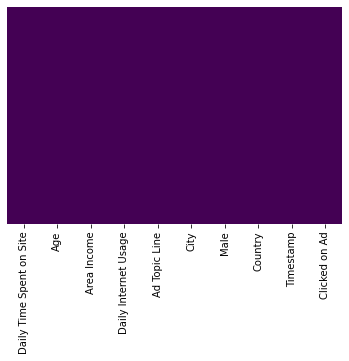

In [14]:
#checking the heatmap for missing data
sns.heatmap(adver_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

All the data is clean and there is no missing value in it, we can move further without inspecting the dataframe. This will make a step towards the data visualizations.

# Exploring Data Analysis

He we are going to analyze our data. This data analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations. This let in better understanding with the dataframe and co-relation between each other interlinking.

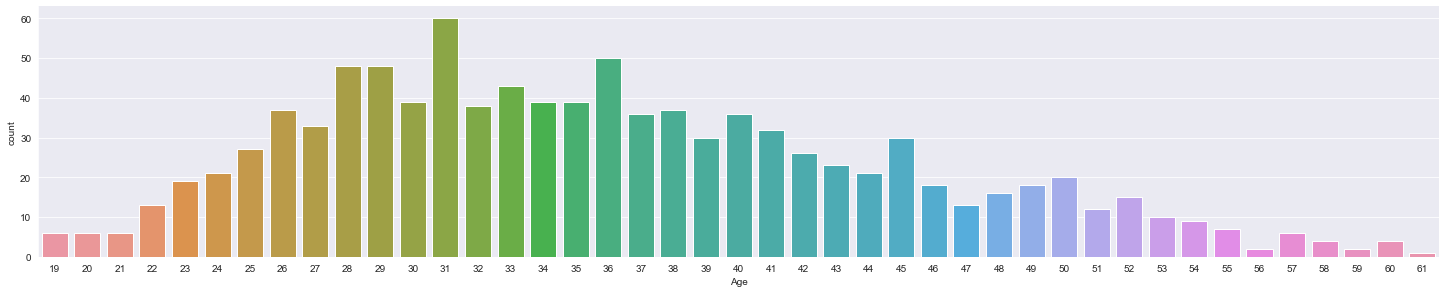

In [15]:
#exploring the age columns and understanding the usage according to the age
sns.set_style('darkgrid')
#ax = sns.countplot(x="Age", data=adver_df, linewidth=25, edgecolor=sns.color_palette("YlOrRd_r", 50))
sns.catplot(x="Age",data=adver_df, kind="count",height=4, aspect=5)
#sns.countplot(x='Age',data=adver_df,palette='RdBu_r')

The above graph analysis reflects that the maximum no. of user starts increasing after the age of 22 and booms somewhere around 31 and 36. While other the mid range that is from 25-45 remain economical and this intensely decreases at the age 61. The usage of internet uses is more at the age 31 and the least is at 61.

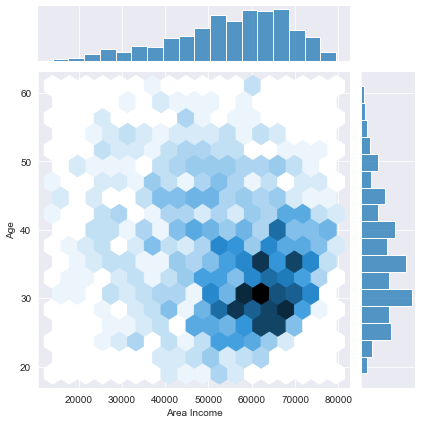

In [16]:
#Create a jointplot showing Area Income versus Age.

sns.jointplot(data=adver_df, x="Area Income", y="Age", kind="hex")

In this relation of area income and age this shows a clear representation of the 'Area Income' vs 'Age'. It seem quite feasable for the people whose age is around 30-40 and earning between 50000 to 75000 are seemed to be earning more than other ages. While if come to the early 20's they are in the education period where there is less chance to earn money and thus low earning. While on the other hand as the age increase it's noticable that the earning start depleting, this might be due to retirement or no pentions plan or other issue. 

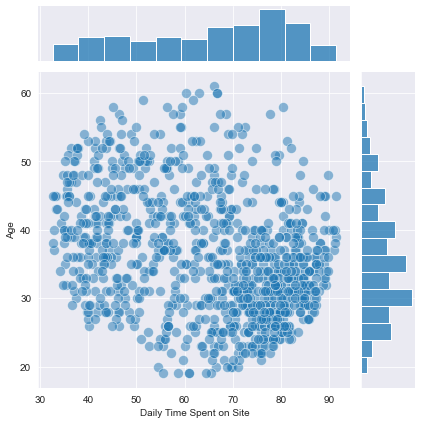

In [17]:
#Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age
g = sns.JointGrid(data=adver_df, x="Daily Time Spent on Site", y="Age")
g.plot_joint(sns.scatterplot, s=100, alpha=.5)
g.plot_marginals(sns.histplot, kde=False)
sns.color_palette("YlOrBr", as_cmap=True)


#sns.relplot(data=adver_df, x="Daily Time Spent on Site", y="Age", hue="day")

create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'*

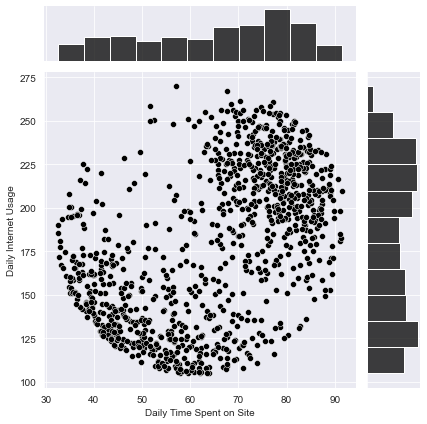

In [26]:
#a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'*
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=adver_df,color='black')

* Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature, to compare with other columns and to understand the act how with respect to other clicked on ad is doing.

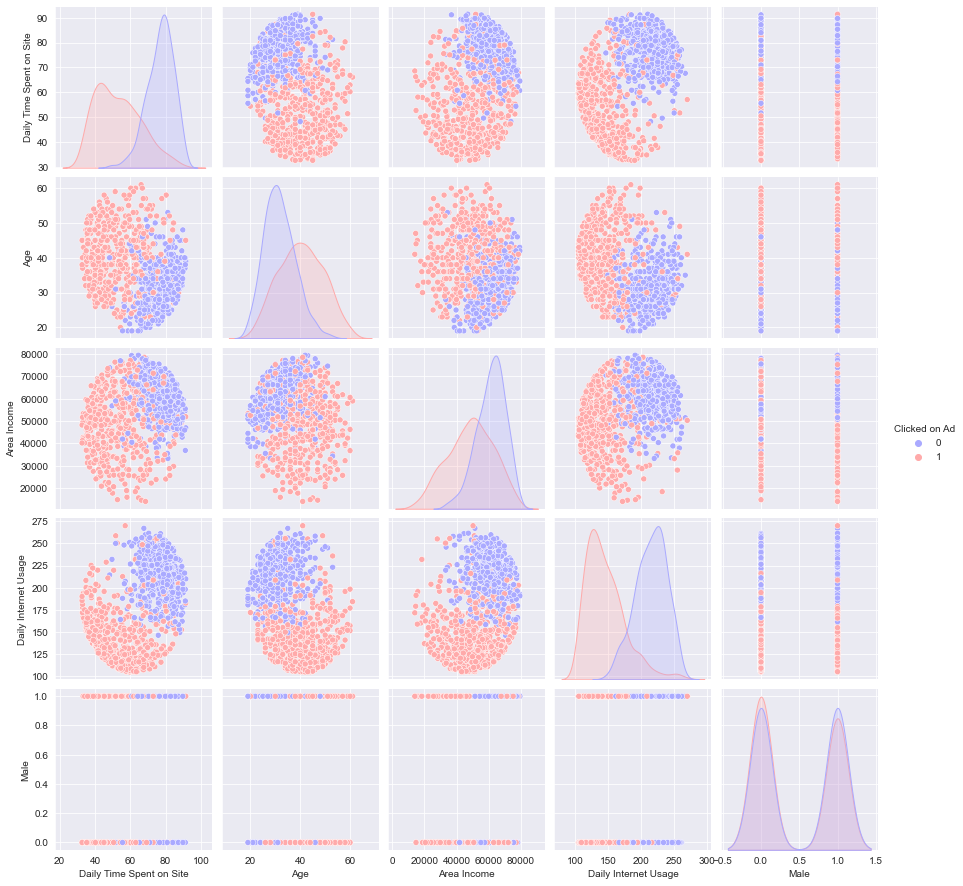

In [38]:
sns.pairplot(adver_df,hue='Clicked on Ad',palette='bwr')

# Logistic Regression

Now it's time to do a train test split, and train our model!

*Split the data into training set and testing set using train_test_split*


In [6]:
#from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [7]:
X = adver_df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Male', 'Daily Internet Usage']]
y = adver_df['Clicked on Ad']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [17]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(670, 5) (330, 5) (670,) (330,)


Train and fit a logistic regression model on the training set.*

In [21]:
from sklearn.linear_model import LogisticRegression


In [22]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)


LogisticRegression()

# Predictions and Evaluation

Now predict values for the testing data.**

In [23]:
predictions = logmodel.predict(X_test)

 Create a classification report for the model.**

In [24]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.96      0.85      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



* The precision rate lies between 86-91*
* The recall rate lies between 96-85*
* f1-score lies between 91-90*
* Support lies between 162-168*
* After training our model we got a 91% of accuracy that mean the model works well and is good enough to give best out of it. 
